In [11]:
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='Boston', version=1, as_frame=True)

# print(dataset)
print(dataset['data'].head())
print(dataset['data'].shape)
print(dataset['target'].head())
print(dataset['target'].shape)


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
(506, 13)
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
(506,)


In [12]:
# X값, y값 할당
X = dataset.data
y = dataset.target

In [15]:
# test set 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [43]:
#KNN Regression 모델 설정
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

In [44]:
#훈련
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [45]:
#예측
y_pred = knn.predict(X_test)

In [48]:
#성능 평가
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 44.748110236220484
R-squared: 0.5127649392223866


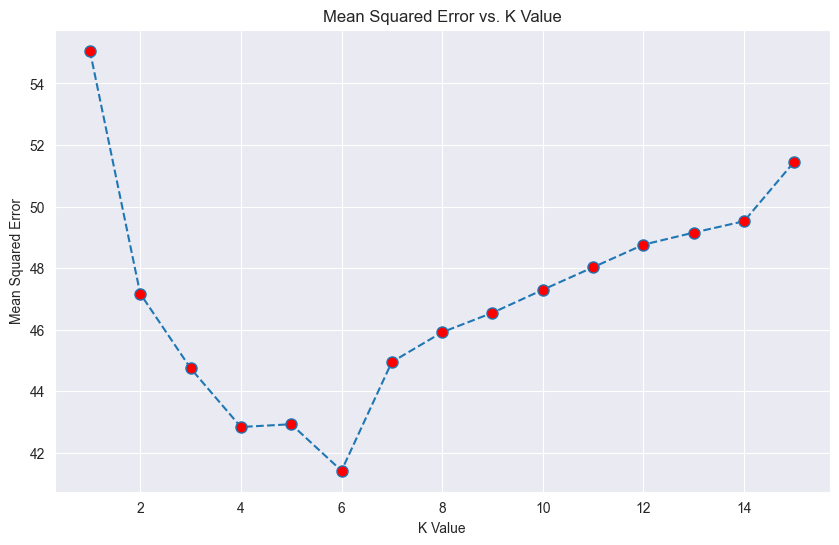

In [47]:
# K값에 따른 그래프 확인
import matplotlib.pyplot as plt

mse_values = []

for i in range(1, 16):
    knn_i = KNeighborsRegressor(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    y_pred_i = knn_i.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_i))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), mse_values, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
plt.title("Mean Squared Error vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.show()